## Exercise 1

Plot the cosmological distances (luminosity, angular diameter distance, comoving distance) using the guiding code below. Compare the result to the Plots that using distance functions calling from CLASS.

##### Luminosity distance

\begin{equation}
d_{L} = \frac{(1+z)c}{H_{0}}\int_{0}^{z} \frac{dz'}{E(z')} 
\end{equation}

##### Angular diameter distance

\begin{equation}
d_{A} = \frac{d_L}{(1+z)^2} 
\end{equation}

##### Comoving distance

\begin{equation}
d_\text{com} = \frac{c}{H_{0}}\int_{0}^{z} \frac{dz'}{E(z')} 
\end{equation}

##### Guiding solution

In [27]:
# initilisation

%matplotlib inline
import numpy as np
import scipy.constants as const 
from scipy.integrate import quad # Gaussian quadrature method for numerical integration
import matplotlib.pyplot as plt
import pandas as pd     # for handling of data files

#font = {'size'   : 12, 'family':'STIXGeneral'}
#axislabelfontsize='large'
# matplotlib.rc('font', **font)
# matplotlib.mathtext.rcParams['legend.fontsize']='medium'

In [28]:
# input parameter
O_cdm = 0.262   # cold dark matter density parameter
O_b = 0.048     # baryon density parameter
O_r = 9.096e-5    # radiation (photon + ultra relativistic species)
O_k = 0.

# Define E(z) function
def E(z, params):
    O_cdm, O_b, O_r, O_k = params
    # ---
    E2 = (O_cdm + O_b)*(1+z)**3 + O_r*(1+z)**4 + O_k*(1+z)**2 + (1 - O_b - O_cdm - O_r - O_k)
    return np.sqrt(E2)
    

In [29]:
# perform calculation (define all needed stuff, otherwise you will get error in compiling)
params = [O_cdm, O_b, O_r, O_k]
## Luminosity distance
def dL(zs, params):
    result = np.array([(1+zi)*quad(lambda zp: 1.0/E(zp, params), 0, zi)[0] for zi in zs])
    return result

## Angular diameter distance
def dA(zs, params):
   return dL(zs,params)/(1 + zs)**2

## Comoving distance
def dcom(zs, params):
    return np.array([quad(lambda zp: 1.0/E(zp, params), 0, zi)[0] for zi in zs])

In [30]:
z_array = np.linspace(0,5)
dcom(z_array,params)

array([0.        , 0.09957571, 0.19409875, 0.28349177, 0.36780009,
       0.44716423, 0.52179218, 0.59193487, 0.65786629, 0.71986847,
       0.77822084, 0.83319312, 0.885041  , 0.93400369, 0.98030304,
       1.02414339, 1.06571216, 1.10518074, 1.14270555, 1.1784292 ,
       1.21248169, 1.24498151, 1.27603671, 1.3057459 , 1.33419919,
       1.36147894, 1.3876606 , 1.41281332, 1.43700061, 1.46028084,
       1.48270774, 1.50433088, 1.52519598, 1.54534535, 1.56481814,
       1.58365064, 1.60187657, 1.61952723, 1.63663178, 1.65321739,
       1.66930941, 1.68493151, 1.70010584, 1.71485312, 1.72919281,
       1.74314312, 1.75672119, 1.76994312, 1.78282407, 1.79537832])

In [ ]:
# Test the function
# params = [O_cdm,O_b,O_r]
# Your dL

Text(0, 0.5, '$d_L$')

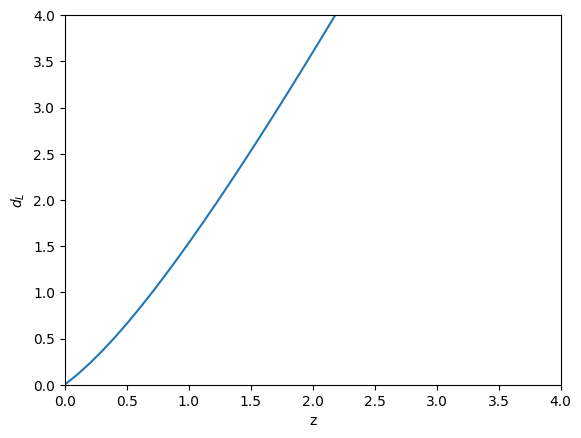

In [31]:
# Perform the plot (define all needed stuff, otherwise you will get error in compiling)

# 1. Define an array for the redshift z
# Your code

# 2. Put z array in dL an make a plot

y = dL(z_array, params)

plt.plot(z_array, y)
plt.xlim(0,4)
plt.ylim(0,4)
plt.xlabel('z')
plt.ylabel('$d_L$')


(0.1, 5)

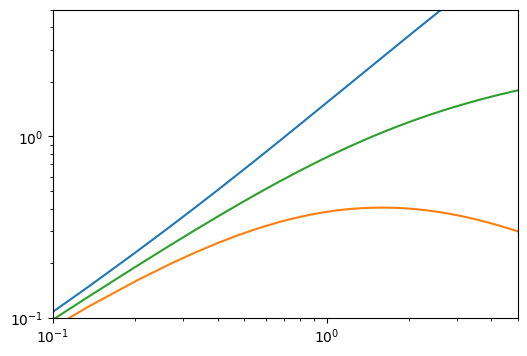

In [32]:

# Goal: to show all of the distances in two models: EdS and LCDM with O_m = 0.31

# make a loop running over all distances

col = ['r','b','g'] # color: red, blue, green

fig, ax = plt.subplots(figsize=(6, 4))

## --- construct z_arr ---
z_arr = np.linspace(0,10,150)

dL_arr = dL(z_arr, params)
dA_arr = dA(z_arr, params)
dcom_arr = dcom(z_arr, params)

distances = [dL_arr, dA_arr, dcom_arr]

for fn in distances:
    ax.loglog(z_arr, fn)
plt.xlim(0.1,5)
plt.ylim(0.1,5)

## Exercise 2

Plot the three distances using the Python wrapper for CLASS, comparing your code in the exercise 1

##### Guiding solution

In [33]:
## Import CLASS
from classy import Class

In [34]:
cosmo = Class()
cosmo.set({
            'T_cmb': 2.7255,
            'H0': 67.81,
            'Omega_b': 0.048,
            'Omega_cdm': 0.262,
            #'background_verbose': 1  # Show some of the cosmological calculation
           }
          )
cosmo.compute()

#### About unit

CLASS will calculate the Hubble at a redshift as in the unit of $\mathrm{Mpc}^{-1}$.
So, in order to obtain the unit of $H(z)$ in $\mathrm{km\;s}^{-1}\mathrm{Mpc}^{-1}$, 
we multiply $H(z)$ with the speed of light (in the unit of $\textrm{km/s}$). 

In [25]:
cosmo.Hubble(0)*const.c/1000

np.float64(67.81000000000002)

In [35]:

c_in_kmps = const.c/1000 # speed of light in vacuum in km/s

H0_1_over_Mpc = cosmo.Hubble(0) # call Hubble constant (in unit of Mpc^{-1}) at redshift 0 

# -----------------------------------------------
# Note: To recover the Hubble constant in km/s/Mpc,
# multiplying H_1_over_Mpc with the speed of light (km/s)
H0 = H0_1_over_Mpc*c_in_kmps 

# -----------------------------------------------
c_over_H = c_in_kmps/H0_1_over_Mpc # c/H0 in REAL Mpc

##### Get background values

In [36]:
#------------------------------------------------
# get list of background quanties
bg = cosmo.get_background()
# bg.keys() to view aviable values

In [37]:
bg['lum. dist.']

array([1.41497863e+18, 1.41383872e+18, 1.41269974e+18, ...,
       7.14066379e+00, 3.56668792e+00, 0.00000000e+00], shape=(40000,))

In [39]:
z_array = bg['z']
dL_array = bg['lum. dist.']
dA_array = bg['ang.diam.dist.']
dcom_array = bg['comov. dist.']

(0.0, 4.0)

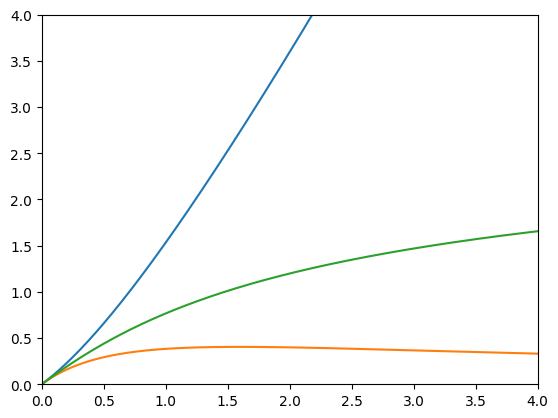

In [42]:

plt.plot(z_array, dL_array*H0_1_over_Mpc)
plt.plot(z_array, dA_array*H0_1_over_Mpc)
plt.plot(z_array, dcom_array*H0_1_over_Mpc)
plt.xlim(0,4)
plt.ylim(0,4)

## Exercise 3

Define distance modulus function below (call the luminosity-distance function from CLASS). Plot with three models, $\Omega_m=0.1$, $\Omega_m=0.3$ and $\Omega_m=0.9$ together with the SN Ia observations from the Pantheon+SH0ES

#### Distance modulus

\begin{equation}
    \mu(z) = 5\log_{10}\left(\frac{d_L(z)}{1~{\rm Mpc}}\right) + 25
\end{equation}

In [71]:
# define distance modulus

# Try to put your code here
def mu(z,params):
    return 5.0*np.log10(dL(z,params)/H0_1_over_Mpc) + 25.0

##### Import Panteon+SH0ES data

In [46]:
# using pandas

df = pd.read_csv('data/Pantheon+SH0ES.dat',delimiter = ' ') # read data in the data file

# this line is to construct dictionary using the first row in the data file as keys.  
SNIa_dict = {col: np.array(df[col].to_numpy()) for col in df.columns}
# SNIa_dict.keys()


In [49]:
SNIa_dict['MU_SH0ES_ERR_DIAG']

array([1.51645 , 1.51747 , 0.782372, ..., 0.281981, 0.358642, 0.281309],
      shape=(1701,))

In [50]:
z_data = SNIa_dict['zCMB']
mu_data = SNIa_dict['MU_SH0ES']
mu_err = SNIa_dict['MU_SH0ES_ERR_DIAG']

/var/folders/3w/j515plxn1nsbbjp4n13dthsr0000gn/T/ipykernel_33500/3218864882.py:5: RuntimeWarning: divide by zero encountered in log10
  return 5.0*np.log10(dL(z,params)/H0_1_over_Mpc) + 25.0


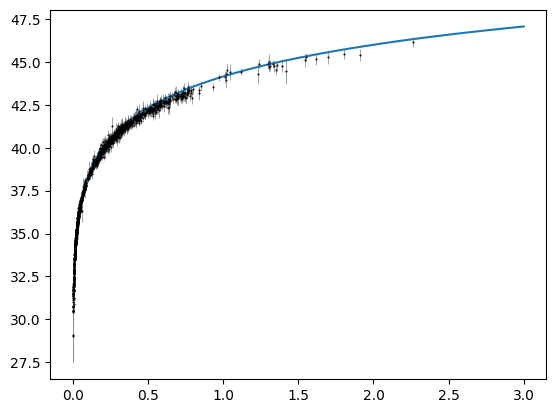

In [72]:
# Plot SNIa data againts theoretical curves
fig, ax = plt.subplots()
ax.errorbar(z_data, mu_data, yerr=mu_err, 
             fmt='.', color='k', ecolor='grey', 
             elinewidth=0.5,ms=1)

z_arr = np.linspace(0,3)
mu_array = mu(z_arr,params)
ax.plot(z_arr, mu_array)